# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [157]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [158]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Test the url and look for documentation
url = "http://api.openweathermap.org/data/2.5/weather?"

req = {
    "appid": weather_api_key,
    "q": "Poway"}
city_url = requests.get(url, params=req).json()
city_url

{'coord': {'lon': -117.0359, 'lat': 32.9628},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 287.55,
  'feels_like': 287.13,
  'temp_min': 284.03,
  'temp_max': 293.64,
  'pressure': 1010,
  'humidity': 80},
 'visibility': 10000,
 'wind': {'speed': 3.09, 'deg': 260},
 'clouds': {'all': 0},
 'dt': 1712892202,
 'sys': {'type': 2,
  'id': 2035440,
  'country': 'US',
  'sunrise': 1712841736,
  'sunset': 1712888119},
 'timezone': -25200,
 'id': 5384690,
 'name': 'Poway',
 'cod': 200}

In [29]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

req = {
    "appid": weather_api_key,
    "q": city

}
# Define an empty list to fetch the weather data for each city and city url list
city_data = []
city_url_list = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
# city url = #YOURCODEHERE
    city_url = f"{url}q={city}&appid={weather_api_key}"
    city_url_list.append(city_url)



    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | uliastay
Processing Record 2 of Set 1 | sur
Processing Record 3 of Set 1 | fraile pintado
Processing Record 4 of Set 1 | arteche
Processing Record 5 of Set 1 | ocean shores
Processing Record 6 of Set 1 | tazovsky
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | ormond-by-the-sea
Processing Record 12 of Set 1 | petropavlovsk-kamchatsky
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | kafr asad
Processing Record 15 of Set 1 | sitka
Processing Record 16 of Set 1 | mili
Processing Record 17 of Set 1 | beldanga
Processing Record 18 of Set 1 | hadibu
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of 

Processing Record 40 of Set 4 | coquimbo
Processing Record 41 of Set 4 | kerikeri
Processing Record 42 of Set 4 | port glaud
City not found. Skipping...
Processing Record 43 of Set 4 | san jeronimo de juarez
Processing Record 44 of Set 4 | broken hill
Processing Record 45 of Set 4 | san luis de la loma
Processing Record 46 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 47 of Set 4 | el bauga
Processing Record 48 of Set 4 | villa yapacani
Processing Record 49 of Set 4 | nuku'alofa
Processing Record 0 of Set 5 | karratha
Processing Record 1 of Set 5 | puerto baquerizo moreno
Processing Record 2 of Set 5 | bubaque
Processing Record 3 of Set 5 | bamboo flat
Processing Record 4 of Set 5 | alotau
City not found. Skipping...
Processing Record 5 of Set 5 | college
Processing Record 6 of Set 5 | sandnessjoen
Processing Record 7 of Set 5 | queenstown
Processing Record 8 of Set 5 | anadyr
Processing Record 9 of Set 5 | pointe-noire
Processing Record 10 of Set 5 | hawaiian par

Processing Record 29 of Set 8 | tazacorte
Processing Record 30 of Set 8 | codrington
Processing Record 31 of Set 8 | morehead city
Processing Record 32 of Set 8 | zajecar
Processing Record 33 of Set 8 | yangor
City not found. Skipping...
Processing Record 34 of Set 8 | winnemucca
Processing Record 35 of Set 8 | miquelon
Processing Record 36 of Set 8 | sirjan
Processing Record 37 of Set 8 | korla
Processing Record 38 of Set 8 | sorong
Processing Record 39 of Set 8 | anabar
City not found. Skipping...
Processing Record 40 of Set 8 | uusikaupunki
Processing Record 41 of Set 8 | murzuq
Processing Record 42 of Set 8 | seven pagodas
Processing Record 43 of Set 8 | kupang
Processing Record 44 of Set 8 | praia da vitoria
Processing Record 45 of Set 8 | ponta delgada
Processing Record 46 of Set 8 | hassi messaoud
Processing Record 47 of Set 8 | agapovka
Processing Record 48 of Set 8 | kodyma
Processing Record 49 of Set 8 | castillos
Processing Record 0 of Set 9 | kangding
Processing Record 1 of

Processing Record 16 of Set 12 | panarukan
Processing Record 17 of Set 12 | padang
Processing Record 18 of Set 12 | udaipura
Processing Record 19 of Set 12 | dillon
Processing Record 20 of Set 12 | gadzhiyevo
Processing Record 21 of Set 12 | mugia
Processing Record 22 of Set 12 | farafenni
Processing Record 23 of Set 12 | lichinga
Processing Record 24 of Set 12 | tommot
Processing Record 25 of Set 12 | placido de castro
Processing Record 26 of Set 12 | orchard homes
Processing Record 27 of Set 12 | ixmiquilpan
Processing Record 28 of Set 12 | saint-philippe
Processing Record 29 of Set 12 | jiagedaqi
Processing Record 30 of Set 12 | port douglas
Processing Record 31 of Set 12 | ngong
Processing Record 32 of Set 12 | lazaro cardenas
Processing Record 33 of Set 12 | saint-francois
Processing Record 34 of Set 12 | la gi
Processing Record 35 of Set 12 | xingcheng
Processing Record 36 of Set 12 | howard springs
Processing Record 37 of Set 12 | kruisfontein
Processing Record 38 of Set 12 | ya

In [26]:
city_url_list

['http://api.openweathermap.org/data/2.5/weather?q=uliastay&appid=1be94ea7fc2cbcbb0695ef3825b26e54',
 'http://api.openweathermap.org/data/2.5/weather?q=sur&appid=1be94ea7fc2cbcbb0695ef3825b26e54',
 'http://api.openweathermap.org/data/2.5/weather?q=fraile pintado&appid=1be94ea7fc2cbcbb0695ef3825b26e54',
 'http://api.openweathermap.org/data/2.5/weather?q=arteche&appid=1be94ea7fc2cbcbb0695ef3825b26e54',
 'http://api.openweathermap.org/data/2.5/weather?q=ocean shores&appid=1be94ea7fc2cbcbb0695ef3825b26e54']

In [30]:
city_weather

{'coord': {'lon': 21.2869, 'lat': 29.1081},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 290.05,
  'feels_like': 288.71,
  'temp_min': 290.05,
  'temp_max': 290.05,
  'pressure': 1018,
  'humidity': 35,
  'sea_level': 1018,
  'grnd_level': 1010},
 'visibility': 10000,
 'wind': {'speed': 3.05, 'deg': 42, 'gust': 3.09},
 'clouds': {'all': 0},
 'dt': 1712895642,
 'sys': {'country': 'LY', 'sunrise': 1712895099, 'sunset': 1712941142},
 'timezone': 7200,
 'id': 88533,
 'name': 'Awjilah',
 'cod': 200}

In [31]:
print(json.dumps(city_data, indent=4))


[
    {
        "City": "uliastay",
        "Lat": 47.7417,
        "Lng": 96.8444,
        "Max Temp": 281.63,
        "Humidity": 35,
        "Cloudiness": 100,
        "Wind Speed": 4.82,
        "Country": "MN",
        "Date": 1712895339
    },
    {
        "City": "sur",
        "Lat": 22.5667,
        "Lng": 59.5289,
        "Max Temp": 303.27,
        "Humidity": 53,
        "Cloudiness": 98,
        "Wind Speed": 2.19,
        "Country": "OM",
        "Date": 1712895339
    },
    {
        "City": "fraile pintado",
        "Lat": -23.9408,
        "Lng": -64.7994,
        "Max Temp": 290.61,
        "Humidity": 95,
        "Cloudiness": 100,
        "Wind Speed": 1.18,
        "Country": "AR",
        "Date": 1712895339
    },
    {
        "City": "arteche",
        "Lat": 12.2645,
        "Lng": 125.4048,
        "Max Temp": 303.34,
        "Humidity": 64,
        "Cloudiness": 72,
        "Wind Speed": 3.58,
        "Country": "PH",
        "Date": 1712895514
    },
    {

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [37]:

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,uliastay,47.7417,96.8444,281.63,35,100,4.82,MN,1712895339
1,sur,22.5667,59.5289,303.27,53,98,2.19,OM,1712895339
2,fraile pintado,-23.9408,-64.7994,290.61,95,100,1.18,AR,1712895339
3,arteche,12.2645,125.4048,303.34,64,72,3.58,PH,1712895514
4,ocean shores,46.9737,-124.1563,282.25,94,100,3.96,US,1712895514
...,...,...,...,...,...,...,...,...,...
570,changling,44.2653,124.0005,295.34,36,85,11.34,CN,1712895641
571,ciudad lazaro cardenas,17.9583,-102.2000,296.71,83,7,0.87,MX,1712895642
572,la passe,45.5549,-0.8967,283.70,93,9,3.20,FR,1712895642
573,plymouth,41.8334,-70.8328,289.05,95,100,3.60,US,1712895642


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = 

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [52]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,uliastay,47.7417,96.8444,281.63,35,100,4.82,MN,1712895339
1,sur,22.5667,59.5289,303.27,53,98,2.19,OM,1712895339
2,fraile pintado,-23.9408,-64.7994,290.61,95,100,1.18,AR,1712895339
3,arteche,12.2645,125.4048,303.34,64,72,3.58,PH,1712895514
4,ocean shores,46.9737,-124.1563,282.25,94,100,3.96,US,1712895514


In [53]:
#Clean df - change temp to C from K and adjust series header
city_data_df['Max Temp']  -= 273.15
city_data_df.rename(columns={'Max Temp': 'Max Temp (C)'}, inplace=True)
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,uliastay,47.7417,96.8444,8.48,35,100,4.82,MN,1712895339
1,sur,22.5667,59.5289,30.12,53,98,2.19,OM,1712895339
2,fraile pintado,-23.9408,-64.7994,17.46,95,100,1.18,AR,1712895339
3,arteche,12.2645,125.4048,30.19,64,72,3.58,PH,1712895514
4,ocean shores,46.9737,-124.1563,9.10,94,100,3.96,US,1712895514


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

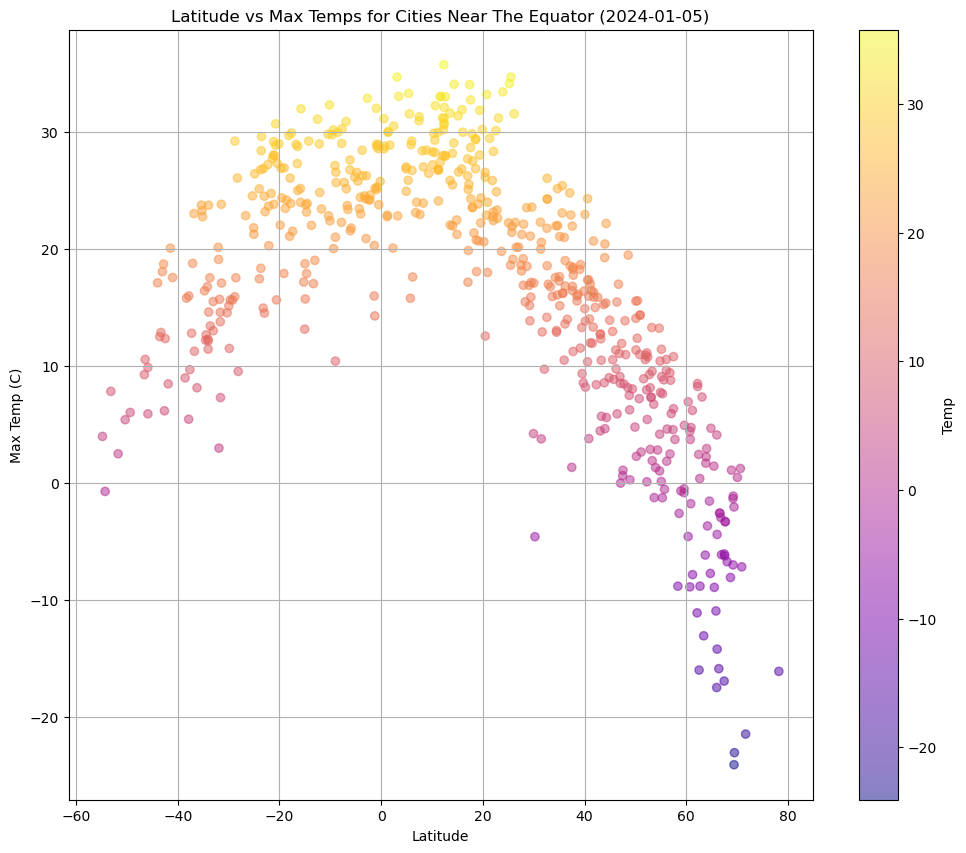

In [73]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(12,10))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp (C)'], c=city_data_df['Max Temp (C)'], cmap='plasma', alpha = .5)

# Incorporate the other graph properties
plt.title("Latitude vs Max Temps for Cities Near The Equator (2024-01-05)")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.grid(True)
plt.colorbar(label = "Temp")

# Save the figure
plt.savefig("../output_data/Fig1_Temp_Lat.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

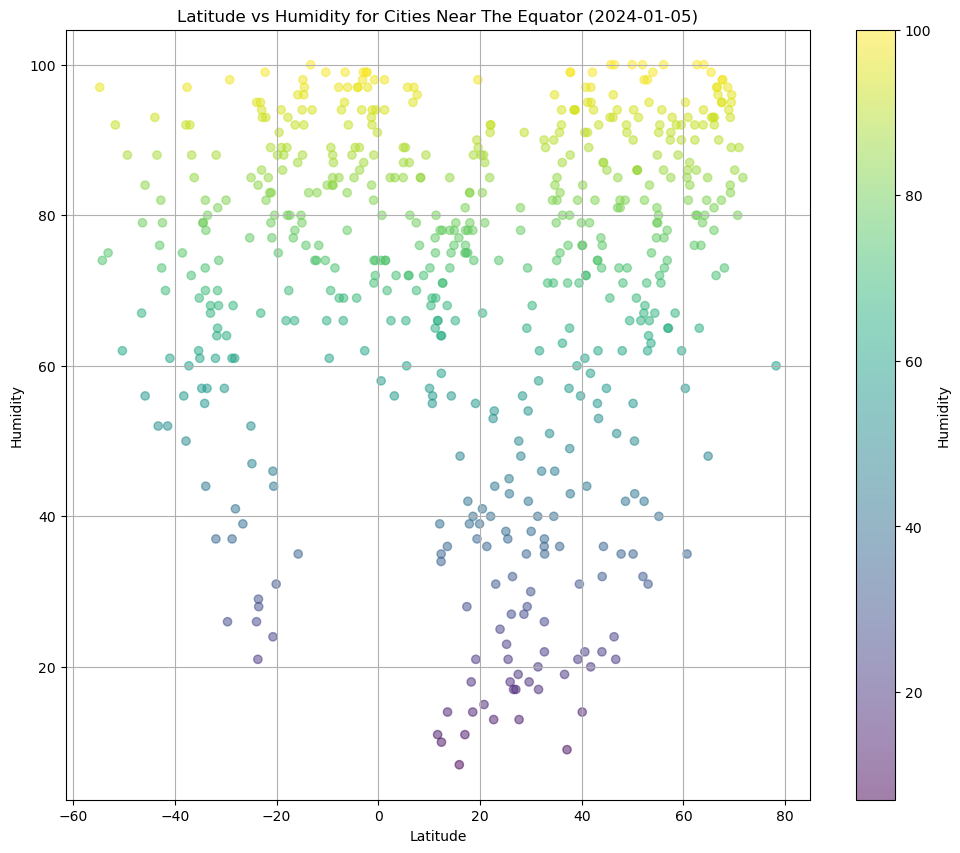

In [75]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(12,10))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], c=city_data_df['Humidity'], cmap='viridis', alpha = .5)

# Incorporate the other graph properties
plt.title("Latitude vs Humidity for Cities Near The Equator (2024-01-05)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.colorbar(label='Humidity')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2_Humidity_Lat.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

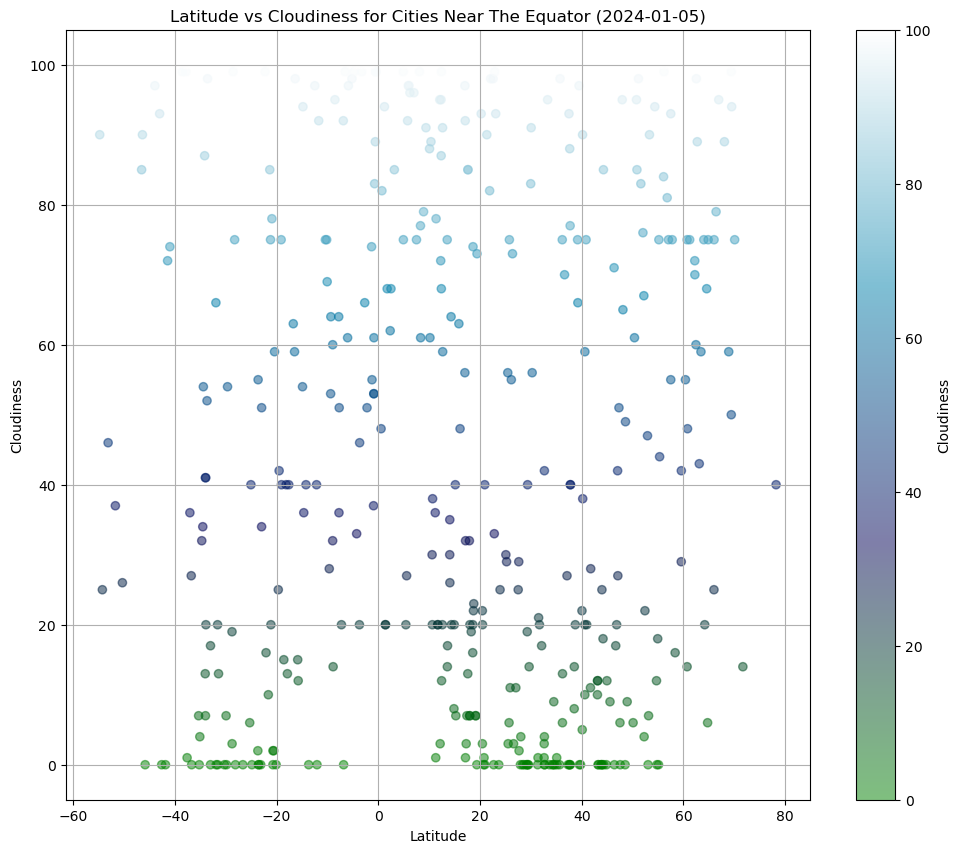

In [92]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(12,10))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], c=city_data_df['Cloudiness'], cmap='ocean', alpha = .5)

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness for Cities Near The Equator (2024-01-05)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.colorbar(label='Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3_Cloudy_Lat.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

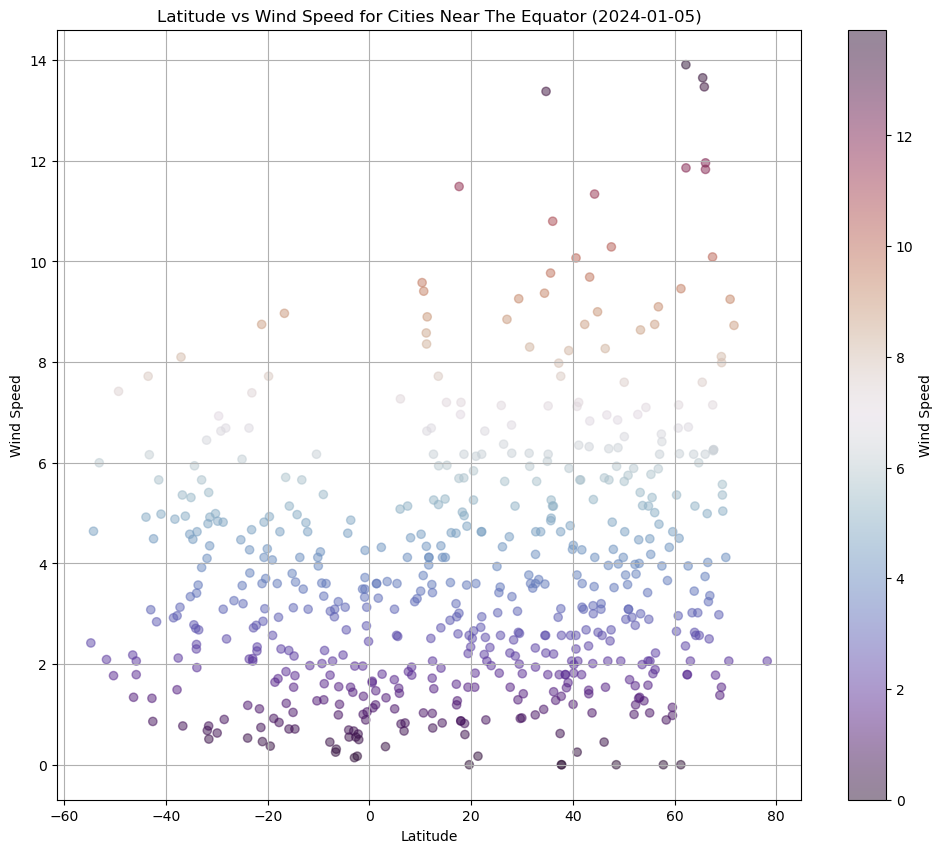

In [97]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(12,10))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], c=city_data_df['Wind Speed'], cmap='twilight_shifted', alpha = .5)

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed for Cities Near The Equator (2024-01-05)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.colorbar(label='Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4_Wind_Lat.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# x_values = weather_data['lat']
# y_values = weather_data['temp']
# plt.scatter(x_values,y_values)
# # Get regression values
# regress_values = x_values * slope + intercept
# print(regress_values)
# line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)
# plt.annotate(line_eq,(20,8),fontsize=15,color="red")


In [12]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

In [101]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0].reset_index()

# Display sample data
northern_hemi_df

,City_ID,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
0,0,uliastay,47.7417,96.8444,8.48,35,100,4.82,MN,1712895339
1,1,sur,22.5667,59.5289,30.12,53,98,2.19,OM,1712895339
2,3,arteche,12.2645,125.4048,30.19,64,72,3.58,PH,1712895514
3,4,ocean shores,46.9737,-124.1563,9.10,94,100,3.96,US,1712895514
4,5,tazovsky,67.4667,78.7000,-16.92,82,100,10.09,RU,1712895515
...,...,...,...,...,...,...,...,...,...,...
385,570,changling,44.2653,124.0005,22.19,36,85,11.34,CN,1712895641
386,571,ciudad lazaro cardenas,17.9583,-102.2000,23.56,83,7,0.87,MX,1712895642
387,572,la passe,45.5549,-0.8967,10.55,93,9,3.20,FR,1712895642
388,573,plymouth,41.8334,-70.8328,15.90,95,100,3.60,US,1712895642


In [102]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<=0].reset_index()

# Display sample data
southern_hemi_df


,City_ID,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
0,2,fraile pintado,-23.9408,-64.7994,17.46,95,100,1.18,AR,1712895339
1,7,grytviken,-54.2811,-36.5092,-0.71,74,25,4.64,GS,1712895515
2,8,ushuaia,-54.8000,-68.3000,3.99,97,90,2.42,AR,1712895291
3,9,port-aux-francais,-49.3500,70.2167,6.04,88,100,7.42,TF,1712895515
4,21,blackmans bay,-43.0167,147.3167,18.07,76,93,3.08,AU,1712895518
...,...,...,...,...,...,...,...,...,...,...
180,555,kruisfontein,-34.0033,24.7314,12.16,70,7,3.41,ZA,1712895638
181,557,aracati,-4.5617,-37.7697,25.81,89,100,2.68,BR,1712895457
182,559,conceicao da barra,-18.5933,-39.7322,24.19,88,15,1.64,BR,1712895639
183,562,north shore,-36.8000,174.7500,23.04,72,27,5.36,NZ,1712895640


###  Temperature vs. Latitude Linear Regression Plot

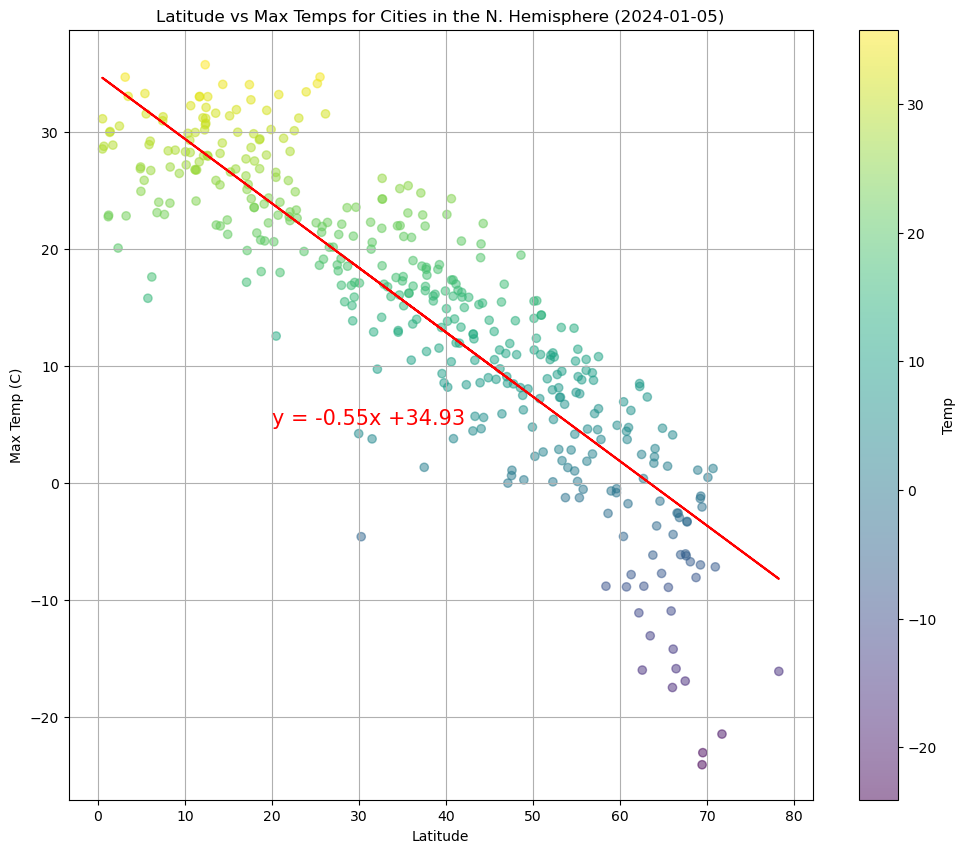

y = -0.55x +34.93


In [135]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp (C)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(12,10))
plt.scatter(x_values, y_values, c=y_values, alpha = .5)

# Incorporate the other graph properties2
plt.title("Latitude vs Max Temps for Cities in the N. Hemisphere (2024-01-05)")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.grid(True)
plt.colorbar(label = "Temp")
plt.annotate(line_eq, (20,5),fontsize=15,color="red")
plt.plot(x_values, regress_values, "r-", label=line_eq)
# Show plot
plt.show()




# Get regression values

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


y = 0.36x +28.6


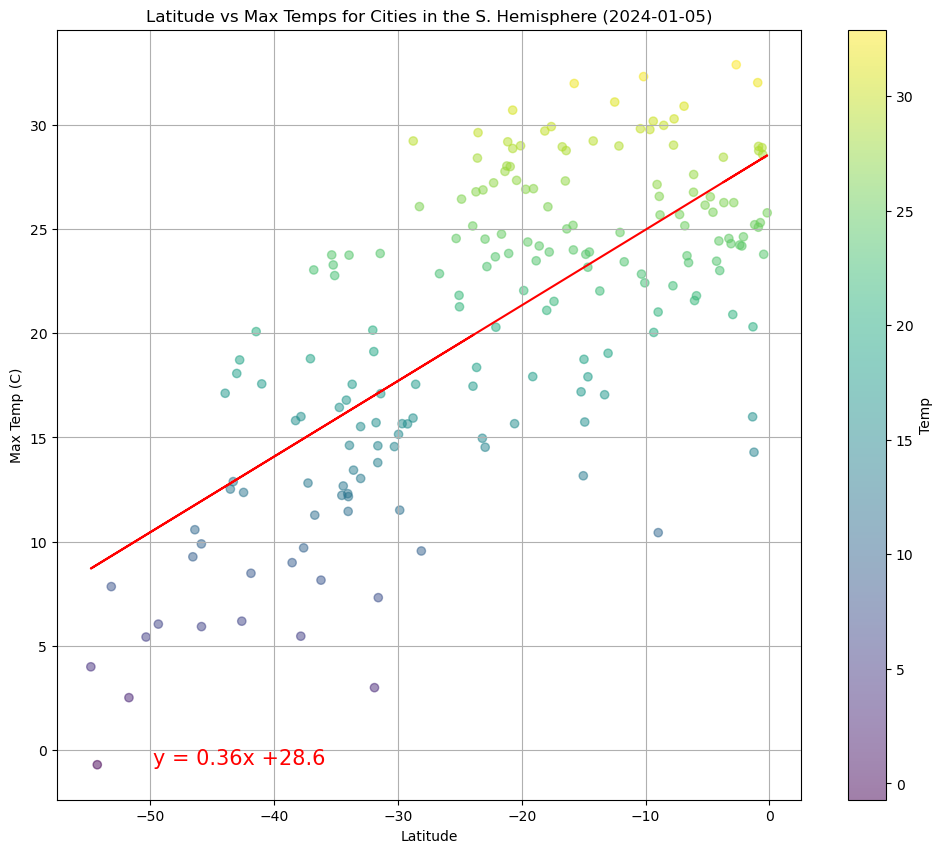

In [128]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp (C)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(12,10))
plt.scatter(x_values, y_values, c=y_values, alpha = .5)
# Incorporate the other graph properties2
plt.title("Latitude vs Max Temps for Cities in the S. Hemisphere (2024-01-05)")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.grid(True)
plt.colorbar(label = "Temp")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.annotate(line_eq,xy=(x_values.min()+5, y_values.min()),fontsize=15,color="red")
plt.plot(x_values, regress_values, "r-", label=line_eq)
# Show plot
plt.show()



**Discussion about the linear relationship:** The Latitude and Temp map suggests that there is a strong correlation between higher temps and the closer a location is to a latitude of 0 (closer to the equator)

### Humidity vs. Latitude Linear Regression Plot

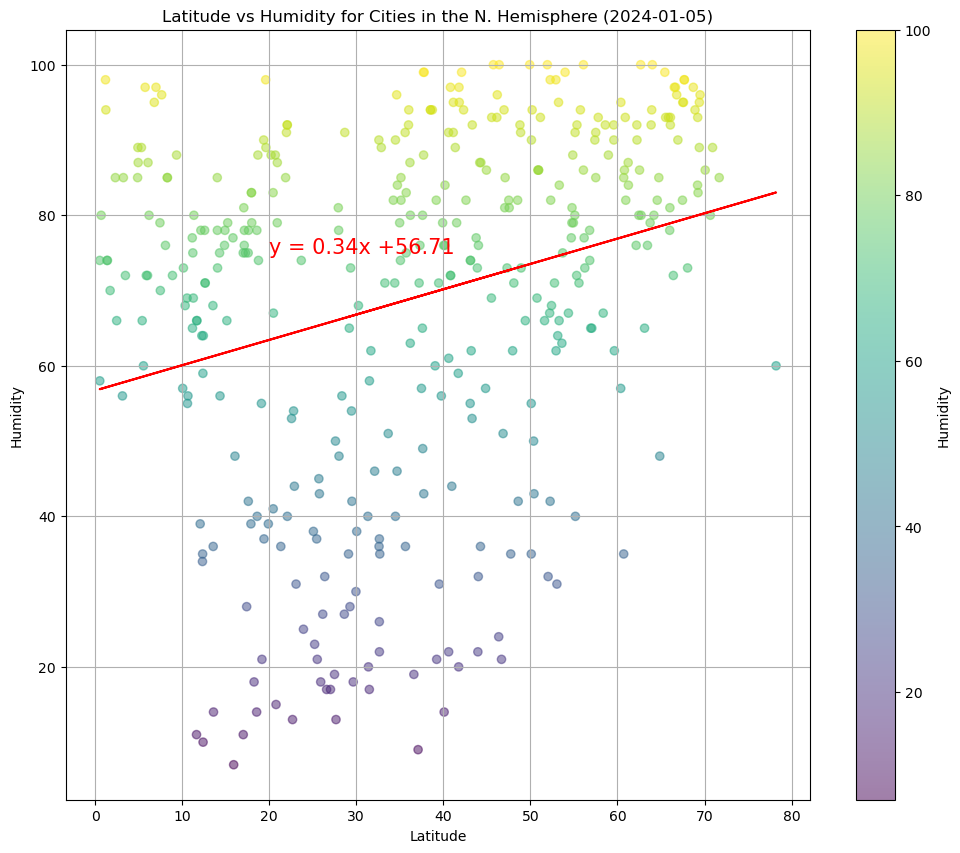

y = 0.34x +56.71


In [141]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(12,10))
plt.scatter(x_values, y_values, c=y_values, alpha = .5)

# Incorporate the other graph properties2
plt.title("Latitude vs Humidity for Cities in the N. Hemisphere (2024-01-05)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
plt.colorbar(label = "Humidity")
plt.annotate(line_eq, (20,75),fontsize=15,color="red")
plt.plot(x_values, regress_values, "r-", label=line_eq)
# Show plot
plt.show()




# Get regression values


print(line_eq)

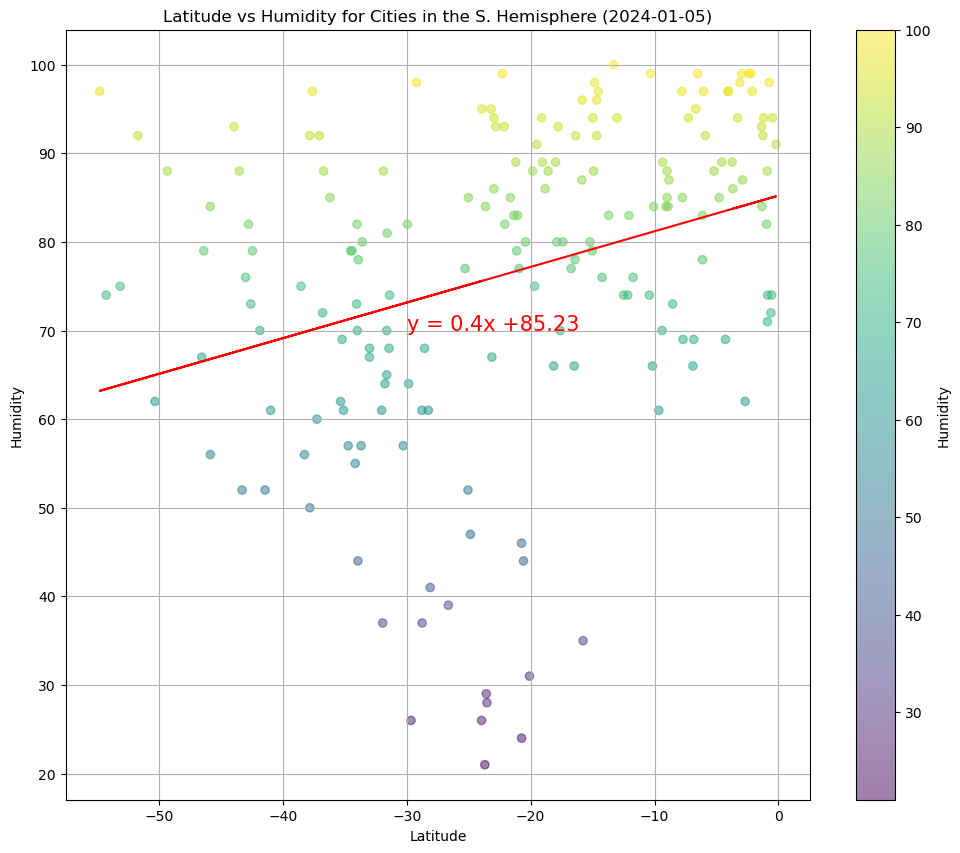

y = 0.4x +85.23


In [144]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(12,10))
plt.scatter(x_values, y_values, c=y_values, alpha = .5)

# Incorporate the other graph properties2
plt.title("Latitude vs Humidity for Cities in the S. Hemisphere (2024-01-05)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
plt.colorbar(label = "Humidity")
plt.annotate(line_eq, (-30,70),fontsize=15,color="red")
plt.plot(x_values, regress_values, "r-", label=line_eq)
# Show plot
plt.show()




# Get regression values


print(line_eq)

**Discussion about the linear relationship:** Based on the graphs from the northern and southern hemisphere, humidity does not correlate to latitude like temperature does. It seems the more north a location is, the higher the humidity is. It also looks like there are more data points with high humidity, which I am not sure if that is normal for the world in general, or if the locations that were picked and random had a higher humidity in general.

### Cloudiness vs. Latitude Linear Regression Plot

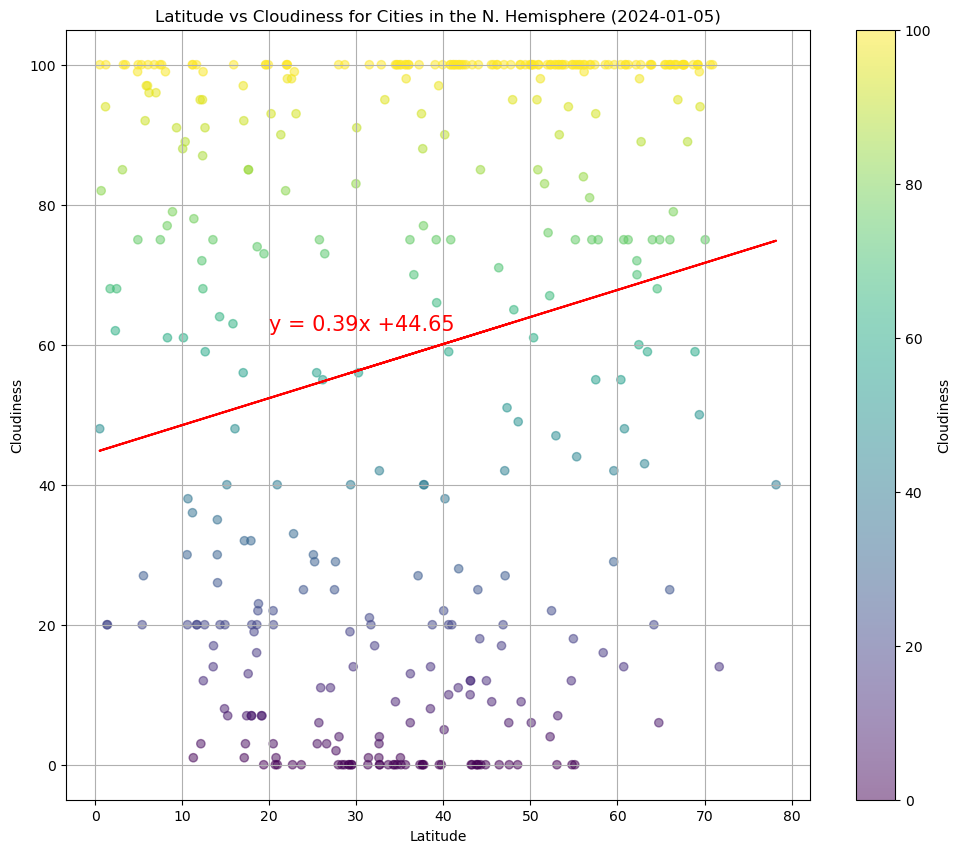

y = 0.39x +44.65


In [147]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(12,10))
plt.scatter(x_values, y_values, c=y_values, alpha = .5)

# Incorporate the other graph properties2
plt.title("Latitude vs Cloudiness for Cities in the N. Hemisphere (2024-01-05)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
plt.colorbar(label = "Cloudiness")
plt.annotate(line_eq, (20,62),fontsize=15,color="red")
plt.plot(x_values, regress_values, "r-", label=line_eq)
# Show plot
plt.show()




# Get regression values


print(line_eq)

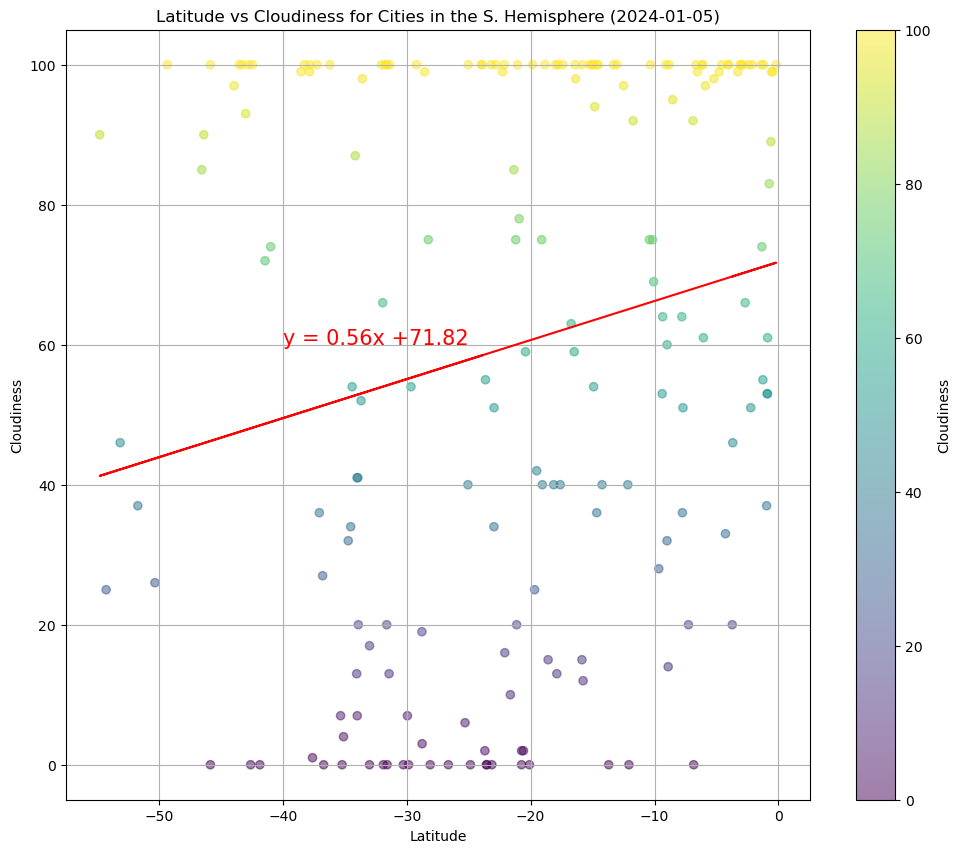

y = 0.56x +71.82


In [149]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(12,10))
plt.scatter(x_values, y_values, c=y_values, alpha = .5)

# Incorporate the other graph properties2
plt.title("Latitude vs Cloudiness for Cities in the S. Hemisphere (2024-01-05)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
plt.colorbar(label = "Cloudiness")
plt.annotate(line_eq, (-40,60),fontsize=15,color="red")
plt.plot(x_values, regress_values, "r-", label=line_eq)
# Show plot
plt.show()




# Get regression values


print(line_eq)

**Discussion about the linear relationship:** The relationship between latitude and cloudiness is similar to that of latitude and humidity. It seems that the more north a location is (higher latitude), the more clouds there are.

### Wind Speed vs. Latitude Linear Regression Plot

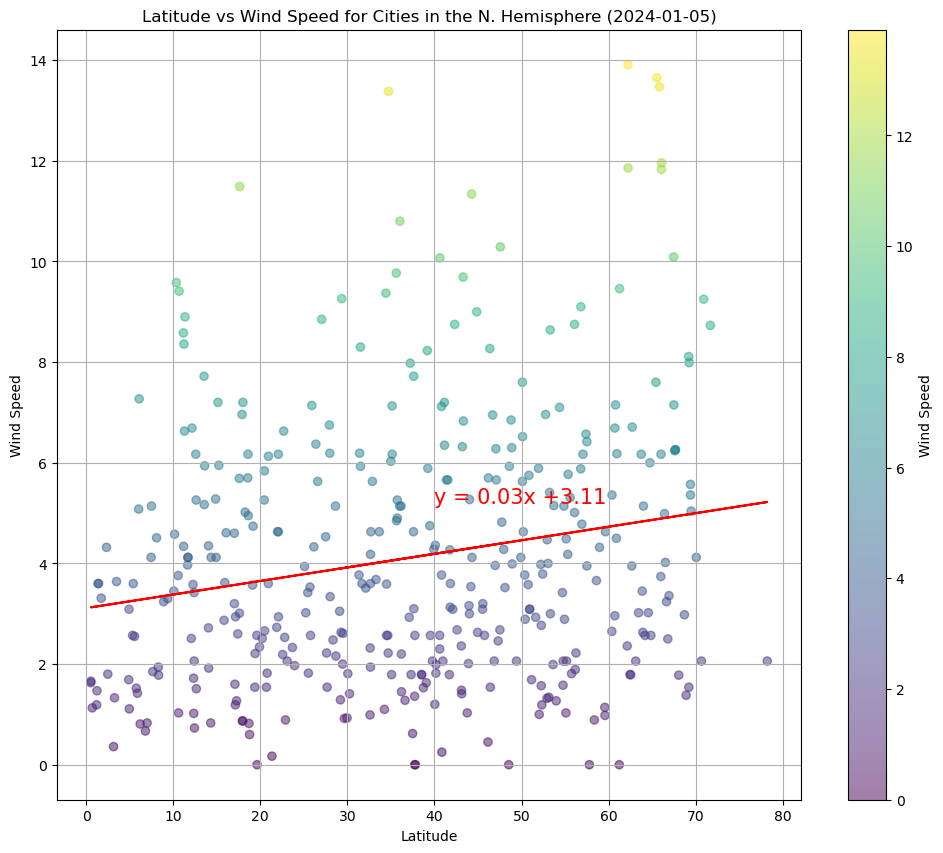

y = 0.03x +3.11


In [154]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(12,10))
plt.scatter(x_values, y_values, c=y_values, alpha = .5)

# Incorporate the other graph properties2
plt.title("Latitude vs Wind Speed for Cities in the N. Hemisphere (2024-01-05)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.colorbar(label = "Wind Speed")
plt.annotate(line_eq, (40,5.2),fontsize=15,color="red")
plt.plot(x_values, regress_values, "r-", label=line_eq)
# Show plot
plt.show()




# Get regression values


print(line_eq)

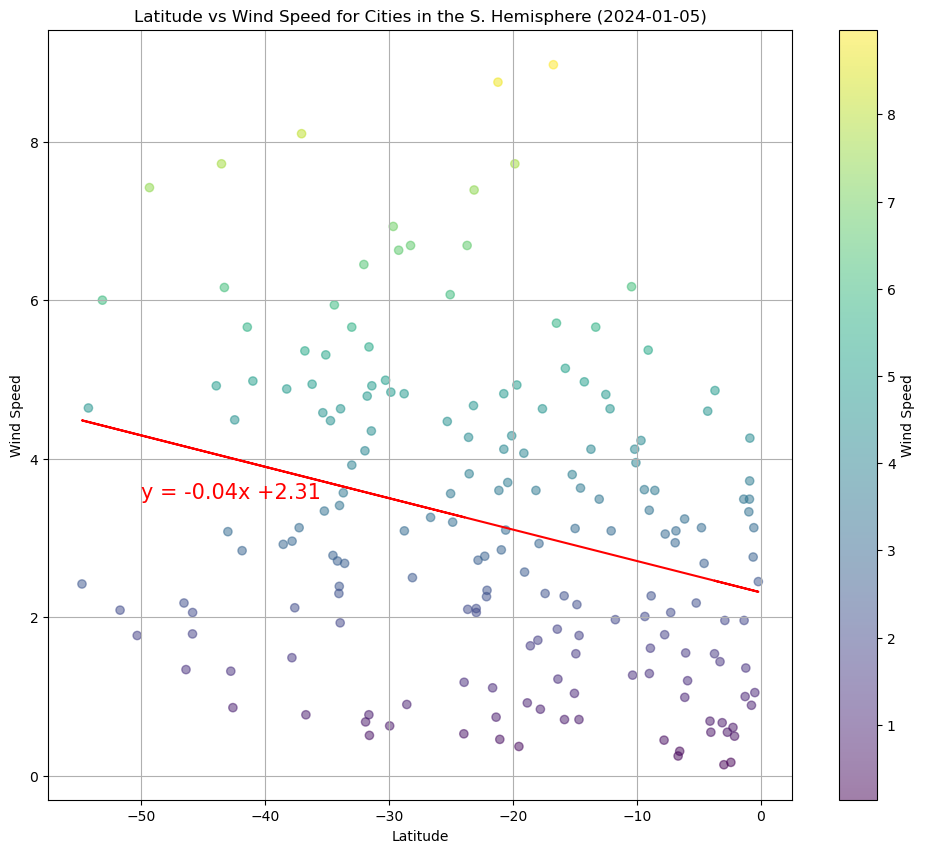

y = -0.04x +2.31


In [156]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(12,10))
plt.scatter(x_values, y_values, c=y_values, alpha = .5)

# Incorporate the other graph properties2
plt.title("Latitude vs Wind Speed for Cities in the S. Hemisphere (2024-01-05)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.colorbar(label = "Wind Speed")
plt.annotate(line_eq, (-50,3.5),fontsize=15,color="red")
plt.plot(x_values, regress_values, "r-", label=line_eq)
# Show plot
plt.show()




# Get regression values


print(line_eq)

**Discussion about the linear relationship:** The wind speed appears to have higher values the closer a location is to the poles (further from a latitude of 0).